# Load Test Data

In [2]:
import pandas as pd
import os
from dotenv import load_dotenv
load_dotenv()
# print(os.getenv('OPENAI_API_KEY'))

# chart_types = ['line', 'bar', 'scatter', 'map']
testset_link = "https://docs.google.com/spreadsheets/d/e/2PACX-1vTDwtO5qoHM1RmugyVcxeXa-uLit2TAF0fKsPiSDxi6GtoNYXIV6EdiZ6-oGEzBg-7L-dICHJiB4Vis/pub?gid=914137684&single=true&output=csv"
testset = pd.read_csv(testset_link)
testset.head()



,CHI23_Task,CHI23_Task.1,CHI23_Answered_DH,CHI23_Task_Pair,CHI23_QCode,CHI23_QCode.1,CHI23_Free_Code,CHI23_Free_Code.1,CHI23_Free_Code.2,Chart Type,...,Classification_Assessment,Response_Ground_Truth,System_Response,Human_Assessment,Human_Rationale,GPT4_Assessment,GPT4_Rationale,GPT4V Response,GPT4V_Assessment,GPT4V_Rationale
0,TX_Filter,NaN,n,TX_Filter,Q_Sighted,NaN,NaN,NaN,NaN,bar,...,Incorrect Classification,"No, the temperature anomalies in the 1960s are...",The 1960s experienced a mix of positive and ne...,5,Correct Answer.,5,Both responses accurately convey that the temp...,"No, the 1960s are not in the positive range on...",NaN,NaN
1,TX_Retrieve_Value,NaN,n,TX_Retrieve_Value,Q_Followup,Q_Sighted,NaN,NaN,NaN,bar,...,Incorrect Classification,N/A; question relevant to data but requires ex...,The temperature anomaly in degrees Celsius for...,3,Ambiguous answer that does not take into accou...,1,Response B offers a comprehensive method of ho...,The image you've provided is a bar chart title...,NaN,NaN
2,TX_Find_Extremum,NaN,y,TX_Find_Extremum,Q_Sighted,NaN,NaN,NaN,NaN,bar,...,Correct Classification,The year that had the highest temperature anom...,The year with the highest temperature anomaly ...,5,Correct Answer.,5,Both Response A and Response B provide the sam...,The chart you've provided shows the Global Lan...,NaN,NaN
3,TX_Find_Extremum,TX_Filter,n,TX_Filter-TX_Find_Extremum,Q_Followup,Q_Sighted,NaN,NaN,NaN,bar,...,Incorrect Classification,N/A; specify condition.,"Based on the dataset description, the highest ...",2,Model jumps to a far fetched interpretation in...,1,"Response B introduces specific, relevant conte...",The chart you've provided is a bar graph showi...,NaN,NaN
4,TX_NA,NaN,n,TX_NA,Q_Chart,Q_Sighted,NaN,NaN,NaN,bar,...,Correct Classification,"Yes, negative temperatures on the left are rep...",Based on the information provided in the data ...,5,Correct Answer.,4,Response B offers a more detailed explanation ...,"Yes, negative temperatures are represented on ...",NaN,NaN


# Predict Navigation Queries Newly Added

In [4]:
# from vizability.classification import classify

# # Extract Navigation Queries
# nav_queries = testset[testset['Classification_Ground_Truth'] == 'Navigation Query']
# # predict the query type using classify
# sample_nav_queries = nav_queries#.sample(3)
# sample_nav_queries['System Classification'] = sample_nav_queries['Questions'].apply(classify)
# print(sample_nav_queries[['Questions', 'Classification_Ground_Truth', 'System Classification']])

                                             Questions  \
777     How do I navigate from Year 1985 to Year 2000?   
778  From Year 1920, what steps do I take to reach ...   
779  I'm currently looking at Temporal Polarity: ne...   
780  Starting at the legend labelled Temporal Polar...   
781  How do I move from Year 2010 to Temporal Polar...   
782  What is my current location if I am viewing Te...   
783  Can you tell me where I am if I'm looking at t...   
784  If I'm viewing the data for Year 2003, what is...   
785  Am I in the section discussing Year values if ...   
786  Where in the tree structure am I if I'm curren...   
787  How do I navigate from the range of inventory ...   
788  What's the quickest path to get from the top o...   
789  Starting from the dates between Jan 1, 2016, a...   
790  From the current point at the lower end of the...   
791  I'm looking at data from the year 2017, how do...   
792  Can you tell me where I am if I'm looking at d...   
793  If I'm ex

/var/folders/hf/s4wflwvn133cxdhqnln404vw0000gn/T/ipykernel_62314/3847010590.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sample_nav_queries['System Classification'] = sample_nav_queries['Questions'].apply(classify)


In [6]:

# sample_nav_queries.to_csv('my_data.csv', index=False)

# Helper Functions

In [10]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from tabulate import tabulate
def create_confusion_matrix(df):
    # Compute confusion matrix
    conf_matrix = confusion_matrix(df["Classification_Ground_Truth"], df["System_Classification"])

    # Generate labels from the unique classes in the data
    labels = sorted(set(df["Classification_Ground_Truth"]).union(set(df["System_Classification"])))

    # Replace "I am sorry but I cannot understand the question" with "Unable to Classify"
    labels = [label if label != "I am sorry but I cannot understand the question." else "Unable to Classify" for label in labels]

    # Convert confusion matrix to DataFrame for visualization
    conf_matrix_df = pd.DataFrame(conf_matrix, columns=labels, index=labels)
    # print(conf_matrix_df)

    # Plotting the confusion matrix as a heatmap
    plt.figure(figsize=(8, 6))
    sns.heatmap(conf_matrix_df, annot=True, fmt="d", cmap="Blues", cbar=False)
    plt.xlabel("System Classification")
    plt.ylabel("Ground Truth")
    plt.title("Confusion Matrix")
    plt.show()
    return conf_matrix



# Generated by ChatGPT
def compute_metrics(conf_matrix, class_names):
    # Number of classes
    num_classes = conf_matrix.shape[0]

    # Initialize dictionaries to store metrics for each class
    precision = {}
    recall = {}
    f1_score = {}

    # Compute metrics for each class
    for i in range(num_classes):
        # True Positives
        TP = conf_matrix[i, i]

        # False Positives
        FP = sum(conf_matrix[:, i]) - TP

        # False Negatives
        FN = sum(conf_matrix[i, :]) - TP

        # Precision
        precision[class_names[i]] = round(TP / (TP + FP) if (TP + FP) != 0 else 0,4)

        # Recall
        recall[class_names[i]] = round(TP / (TP + FN) if (TP + FN) != 0 else 0,4)

        # F1-score
        f1_score[class_names[i]] = round(2 * precision[class_names[i]] * recall[class_names[i]] / (precision[class_names[i]] + recall[class_names[i]]) if (precision[class_names[i]] + recall[class_names[i]]) != 0 else 0,4)

    # Overall accuracy
    accuracy = round(np.trace(conf_matrix) / np.sum(conf_matrix),4)

    # Prepare data for tabulation
    metrics_data = []
    for class_name in labels:
        metrics_data.append([class_name, precision[class_name], recall[class_name], f1_score[class_name]])

    # Add accuracy row
    metrics_data.append(['Overall Accuracy', accuracy, '', ''])

    # Print the table
    headers = ['Class', 'Precision', 'Recall', 'F1 Score']
    print(tabulate(metrics_data, headers=headers, floatfmt=".4f"))

    return accuracy, precision, recall, f1_score

# Teseting Sampled Data

In [7]:
# Group by 'Classification_Ground_Truth' and sample 5% from each group
sample_df = testset.groupby('Classification_Ground_Truth').sample(n=12, random_state=64)

# Print the number of rows in the sampled DataFrame
num_rows = sample_df.shape[0]
print(f"Number of rows in the sampled DataFrame: {num_rows}")

Number of rows in the sampled DataFrame: 48


In [8]:

# Generate labels from the unique classes in the data
labels = sorted(set(sample_df["Classification_Ground_Truth"]).union(set(sample_df["System_Classification"])))
# Replace "I am sorry but I cannot understand the question" with "Unable to Classify"
labels = [label if label != "I am sorry but I cannot understand the question" else "Unable to Classify" for label in labels]
labels


['Analytical Query',
 'Contextual Query',
 'Unable to Classify',
 'Navigation Query',
 'Visual Query']

## Testing Original Prompt on Sampled data

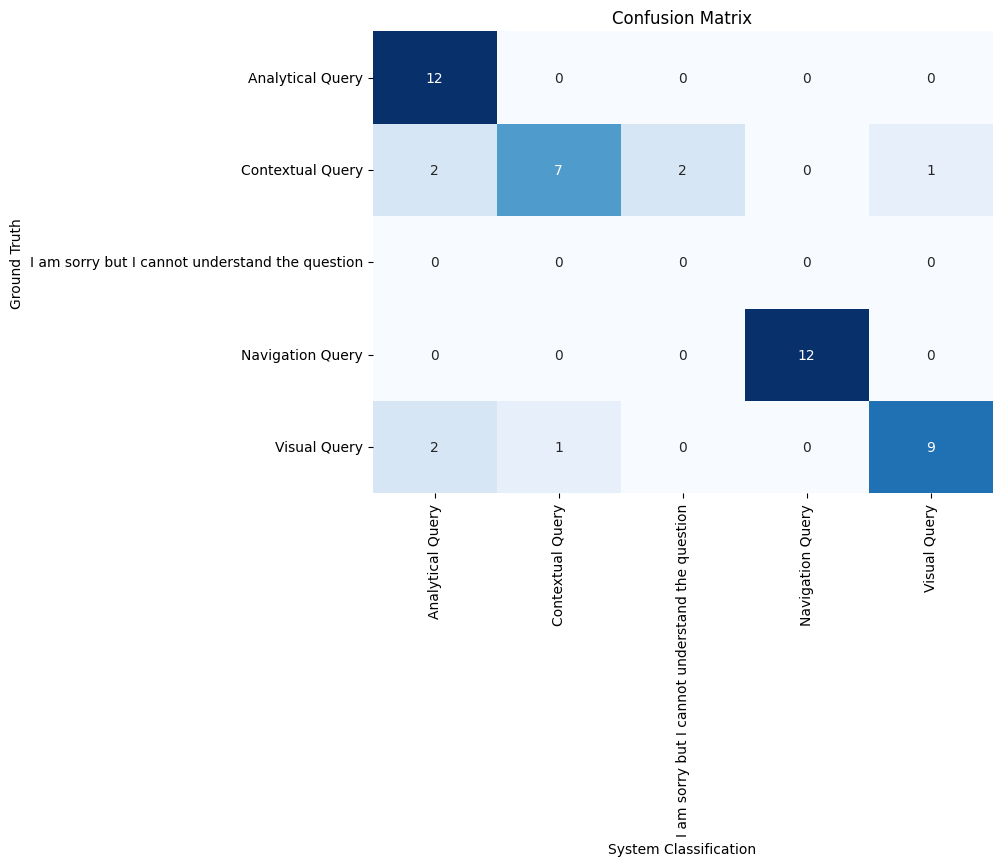

Class                 Precision  Recall    F1 Score
------------------  -----------  --------  ----------
Analytical Query         0.7500  1.0       0.8571
Contextual Query         0.8750  0.5833    0.7
Unable to Classify       0.0000  0         0
Navigation Query         1.0000  1.0       1.0
Visual Query             0.9000  0.75      0.8182
Overall Accuracy         0.8333


In [11]:
conf_matrix = create_confusion_matrix(sample_df)

accuracy, precision, recall, f1_score = compute_metrics(conf_matrix, labels)


## New Prompt with Tree view  text

In [12]:
from vizability.classification import classify
new_test = sample_df.copy()

def apply_classify(row):
    with open(f"treeview_text/{row['Chart Type']}_treeview.txt", "r") as file_object:
        treeview_text = file_object.read()  
        print("classifying ", row['Questions'])
    # chart_data = pd.read_csv(f"chart_data/{row['Chart Type']}_transformed_data.csv")
    return classify(row['Questions'], 4, treeview_text)
new_test['System_Classification'] = new_test.apply(apply_classify, axis=1)

# new_test.apply(lambda d: print(d["Questions"], d['Classification_Ground_Truth'], " >>> ", d["System_Classification"]), axis=1)


/Users/nam.wook.kim/Projects/vizability/evaluation/env/lib/python3.11/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


classifying  Which African country has the highest life expectancy?


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


classifying  What was the highest temperature in 2016?
classifying  Which North American country has the lowest vaccination rate?
classifying  What is the vaccination percent of the country with the highest vaccination rate?
classifying  Which countries have the highest vaccination rates?
classifying  What is the vaccination rate of Columbia?
classifying  What is the vaccination rate in Canada?
classifying  What was the temperature anomaly in the 1800s?
classifying  Between 1921 and 2021, which year had the lowest anomaly?
classifying  How many countries have a vaccination of 50%?
classifying  For the time from September 2019 to September 2020, what was the average decrease in homes for sale?
classifying  What is the lowest percentage of houses sale in that two years range between 2020 and 2021?
classifying  What does it mean by positive temperature anomaly?
classifying  What does it mean by temperature anomaly?
classifying  Can I see more detail?
classifying  Where's Australia?
classi

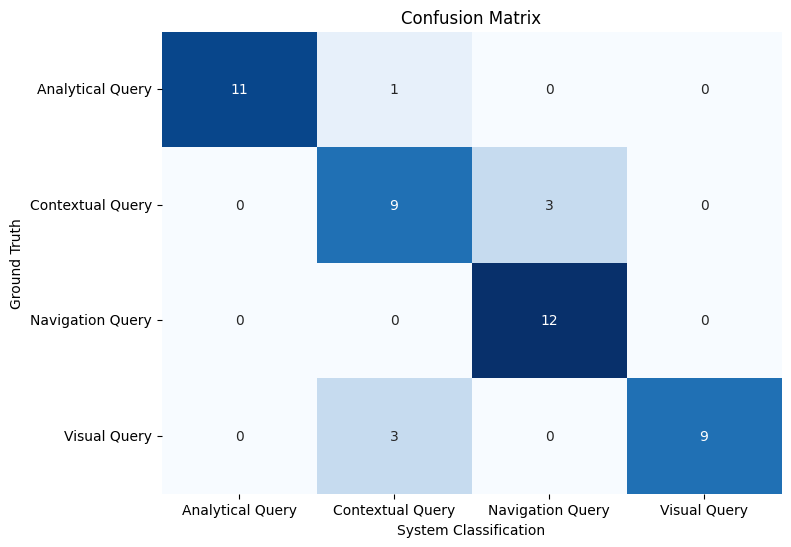

Class               Precision  Recall    F1 Score
----------------  -----------  --------  ----------
Analytical Query       1.0000  0.9167    0.9565
Contextual Query       0.6923  0.75      0.72
Navigation Query       0.8000  1.0       0.8889
Visual Query           1.0000  0.75      0.8571
Overall Accuracy       0.8542


In [13]:
labels = sorted(set(new_test["Classification_Ground_Truth"]).union(set(new_test["System_Classification"])))
labels = [label if label != "I am sorry but I cannot understand the question." else "Unable to Classify" for label in labels]
conf_matrix = create_confusion_matrix(new_test)

accuracy, precision, recall, f1_score = compute_metrics(conf_matrix, labels)


## Increasing # of Examples

In [14]:
from vizability.classification import classify
new_test_more_examples = sample_df.copy()

def apply_classify(row):
    with open(f"treeview_text/{row['Chart Type']}_treeview.txt", "r") as file_object:
        treeview_text = file_object.read()  
        print(row.name, "classifying ", row['Questions'])
    # chart_data = pd.read_csv(f"chart_data/{row['Chart Type']}_transformed_data.csv")
    return classify(row['Questions'], 8, treeview_text)
new_test_more_examples['System_Classification'] = new_test_more_examples.apply(apply_classify, axis=1)


730 classifying  Which African country has the highest life expectancy?
128 classifying  What was the highest temperature in 2016?
520 classifying  Which North American country has the lowest vaccination rate?
463 classifying  What is the vaccination percent of the country with the highest vaccination rate?
502 classifying  Which countries have the highest vaccination rates?
471 classifying  What is the vaccination rate of Columbia?
464 classifying  What is the vaccination rate in Canada?
130 classifying  What was the temperature anomaly in the 1800s?
11 classifying  Between 1921 and 2021, which year had the lowest anomaly?
366 classifying  How many countries have a vaccination of 50%?
191 classifying  For the time from September 2019 to September 2020, what was the average decrease in homes for sale?
269 classifying  What is the lowest percentage of houses sale in that two years range between 2020 and 2021?
75 classifying  What does it mean by positive temperature anomaly?
76 classify

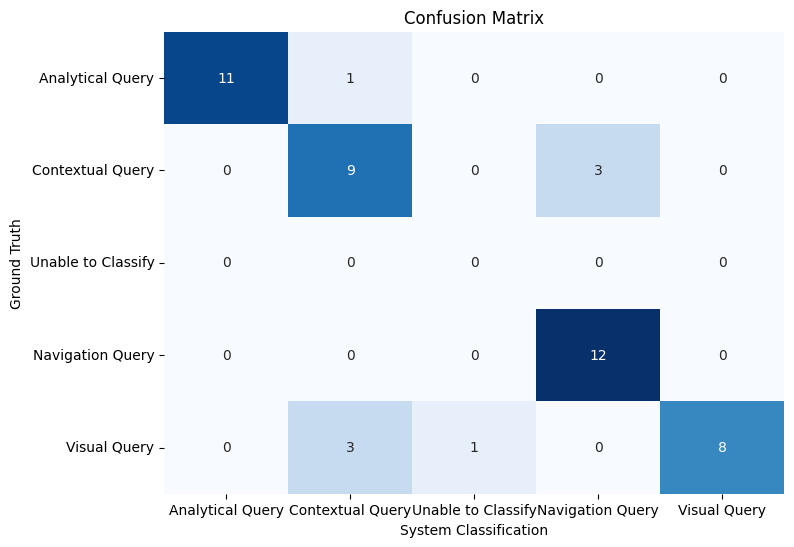

Class                 Precision  Recall    F1 Score
------------------  -----------  --------  ----------
Analytical Query         1.0000  0.9167    0.9565
Contextual Query         0.6923  0.75      0.72
Unable to Classify       0.0000  0         0
Navigation Query         0.8000  1.0       0.8889
Visual Query             1.0000  0.6667    0.8
Overall Accuracy         0.8333


In [15]:
labels = sorted(set(new_test_more_examples["Classification_Ground_Truth"]).union(set(new_test_more_examples["System_Classification"])))
labels = [label if label != "I am sorry but I cannot understand the question." else "Unable to Classify" for label in labels]

conf_matrix = create_confusion_matrix(new_test_more_examples)

accuracy, precision, recall, f1_score = compute_metrics(conf_matrix, labels)


## Applying Query Refinement (not working well, often changes the purpose of the query especially the navigation query)

In [10]:
# from vizability.refinement import refine
# new_test_refinement = sample_df.sample(5).copy()

    
# def apply_refine(row):
#     with open(f"treeview_text/{row['Chart Type']}_treeview.txt", "r") as file_object:
#         treeview_text = file_object.read()
#     return refine(row['Questions'], treeview_text)

# new_test_refinement['Refined_Questions'] = new_test_refinement.apply(apply_refine, axis=1)

# new_test_refinement.apply(lambda d: print(d["Questions"], d["Classification_Ground_Truth"], " >>> ", d["Refined_Questions"]),axis = 1)




What do the axes represent? Visual Query  >>>  What do the axes GDP per capita and Life expectancy at birth represent?
Can you guide me from the Congo to the legend titled percent_fully_vaccinated? Navigation Query  >>>  For which country is the percent fully vaccinated represented in the legend?
How can I move from the Life expectancy at birth (historical) axis to the GDP per capita axis directly? Navigation Query  >>>  How can I switch the focus from the Life expectancy at birth (historical) axis to the GDP per capita axis directly?
Okay, so why is Asia and Barbados in the same region? Contextual Query  >>>  Why are Asia and Barbados grouped together in the chart based on GDP per capita and life expectancy at birth?
Which South American country has the highest life expectancy? Analytical Query  >>>  Which South American country has the highest life expectancy at birth?


615    None
810    None
799    None
577    None
768    None
dtype: object

## Check Model

In [8]:
from vizability.prompt import check_config

print(check_config())

{'default_model': 'gpt-3.5-turbo-1106', 'default_temperature': 0}


## Applying Newer GPT Models

In [9]:
# change the config file and restart the session or reload the module before running this
from vizability.classification import classify
new_test_more_examples_gpt4 = sample_df.copy()

def apply_classify(row):
    with open(f"treeview_text/{row['Chart Type']}_treeview.txt", "r") as file_object:
        treeview_text = file_object.read()          
    # chart_data = pd.read_csv(f"chart_data/{row['Chart Type']}_transformed_data.csv")
    query_type = classify(row['Questions'], 8, treeview_text)
    print(row.name, "classifying ", row['Questions'], ">>>", query_type)
    return query_type
new_test_more_examples_gpt4['System_Classification'] = new_test_more_examples_gpt4.apply(apply_classify, axis=1)


768 classifying  Which South American country has the highest life expectancy? >>> Analytical Query
136 classifying  What year had the greatest negative temperature anomaly? >>> Analytical Query
241 classifying  On average, how many homes are on sale in October 2020? >>> Analytical Query
134 classifying  What what was the lowest temperature anomaly? >>> Analytical Query
420 classifying  What countries in North America have less than 80% vaccination rate? >>> Analytical Query
361 classifying  How many countries are in the zero to 20% vaccination range? >>> Analytical Query
640 classifying  What is the average life expectancy for somebody living in Africa who has GDP 5000? >>> Analytical Query
584 classifying  What are the data points of this data? >>> I am sorry but I cannot understand the question.
137 classifying  What year had the greatest positive temperature anomaly? >>> Analytical Query
463 classifying  What is the vaccination percent of the country with the highest vaccination ra

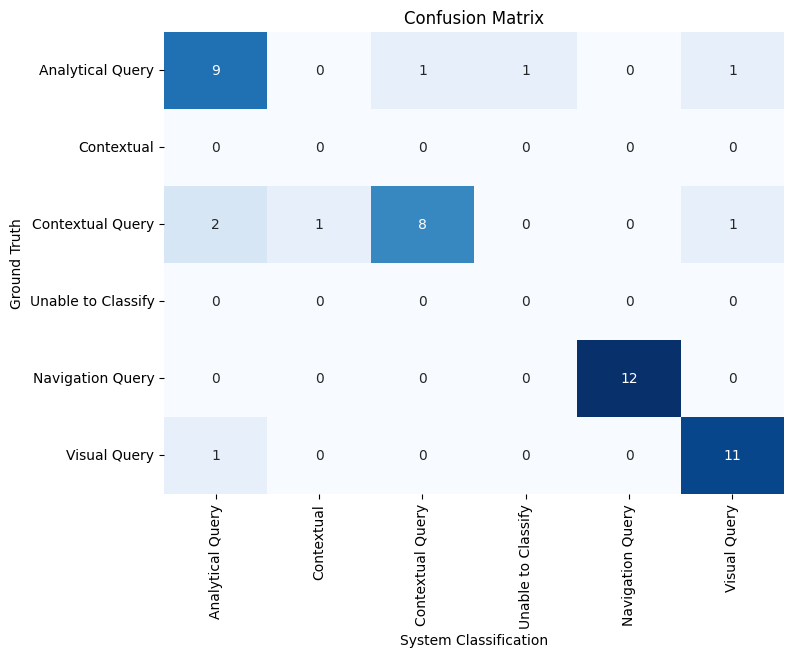

Class                 Precision  Recall    F1 Score
------------------  -----------  --------  ----------
Analytical Query         0.7500  0.75      0.75
Contextual               0.0000  0         0
Contextual Query         0.8889  0.6667    0.7619
Unable to Classify       0.0000  0         0
Navigation Query         1.0000  1.0       1.0
Visual Query             0.8462  0.9167    0.88
Overall Accuracy         0.8333


In [21]:
labels = sorted(set(new_test_more_examples["Classification_Ground_Truth"]).union(set(new_test_more_examples["System_Classification"])))
labels = [label if label != "I am sorry but I cannot understand the question." else "Unable to Classify" for label in labels]

conf_matrix = create_confusion_matrix(new_test_more_examples)

accuracy, precision, recall, f1_score = compute_metrics(conf_matrix, labels)


# Testing All Sampled Data

## Original Evaluation

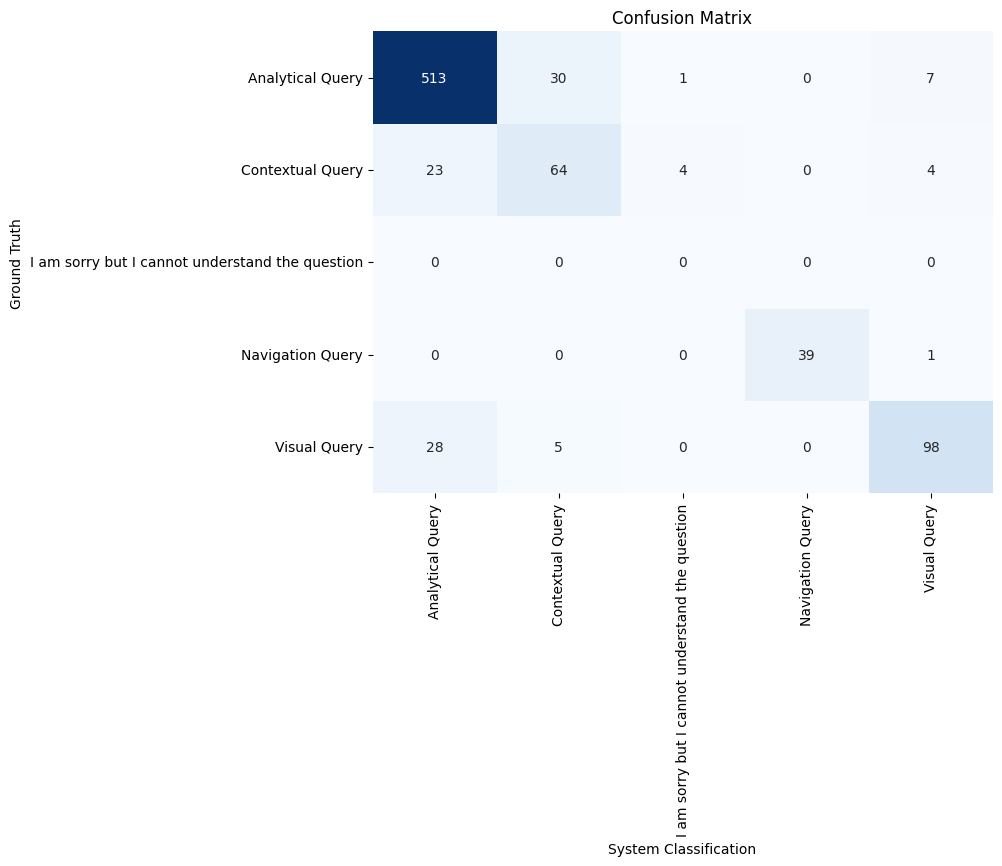

Class                                              Precision  Recall    F1 Score
-----------------------------------------------  -----------  --------  ----------
Analytical Query                                      0.9096  0.931     0.9202
Contextual Query                                      0.6465  0.6737    0.6598
I am sorry but I cannot understand the question       0.0000  0         0
Navigation Query                                      1.0000  0.975     0.9873
Visual Query                                          0.8909  0.7481    0.8133
Overall Accuracy                                      0.8739


In [7]:
labels = sorted(set(testset["Classification_Ground_Truth"]).union(set(testset["System_Classification"])))

labels = [label if label != "I am sorry but I cannot understand the question." else "Unable to Classify" for label in labels]

conf_matrix = create_confusion_matrix(testset)

accuracy, precision, recall, f1_score = compute_metrics(conf_matrix, labels)


## New Prompt with Tree view text + Increasing # of Examples

In [11]:
from vizability.classification import classify
all_new_test_more_examples = testset.copy()

def apply_classify(row):
    with open(f"treeview_text/{row['Chart Type']}_treeview.txt", "r") as file_object:
        treeview_text = file_object.read()  
    query_type = classify(row['Questions'], 8, treeview_text)
    print(row.name, "classifying ", row['Questions'], row['Classification_Ground_Truth'], ">>>", query_type)
    # chart_data = pd.read_csv(f"chart_data/{row['Chart Type']}_transformed_data.csv")
    return query_type
all_new_test_more_examples['System_Classification'] = all_new_test_more_examples.apply(apply_classify, axis=1)


0 classifying  1960s is in positive range? Analytical Query >>> Visual Query
1 classifying  And what was that temperature? Analytical Query >>> I am sorry but I cannot understand the question.
2 classifying  And what year has the highest? Analytical Query >>> I am sorry but I cannot understand the question.
3 classifying  And what year was that? Analytical Query >>> I am sorry but I cannot understand the question.
4 classifying  Are negative temperatures on the left represented along the y-axis? Visual Query >>> Visual Query
5 classifying  Are the bars red between 1940 and 2021? Visual Query >>> Visual Query
6 classifying  Are the ocean level rising? Contextual Query >>> Contextual Query
7 classifying  Are the results of this table a combination of ocean and land values? Analytical Query >>> Contextual Query
8 classifying  Are there more blue bars or red bars? Visual Query >>> Visual Query
9 classifying  Are there more negative or positive temperature anomalies? Analytical Query >>> An

KeyboardInterrupt: 

In [ ]:
labels = sorted(set(all_new_test_more_examples["Classification_Ground_Truth"]).union(set(all_new_test_more_examples["System_Classification"])))
labels = [label if label != "I am sorry but I cannot understand the question." else "Unable to Classify" for label in labels]

conf_matrix = create_confusion_matrix(all_new_test_more_examples)

accuracy, precision, recall, f1_score = compute_metrics(conf_matrix, labels)


## Applying Newer GPT Models (Not Worth it)

In [ ]:
# # change the config file before running this

# from vizability.classification import classify
# large_new_test_more_examples = large_sample_df.copy()

# def apply_classify(row):
#     with open(f"treeview_text/{row['Chart Type']}_treeview.txt", "r") as file_object:
#         treeview_text = file_object.read()  
#         print(row.name, "classifying ", row['Questions'])
#     # chart_data = pd.read_csv(f"chart_data/{row['Chart Type']}_transformed_data.csv")
#     return classify(row['Questions'], 8, treeview_text)
# large_new_test_more_examples['System_Classification'] = large_new_test_more_examples.apply(apply_classify, axis=1)


# Large Sample

# Original 

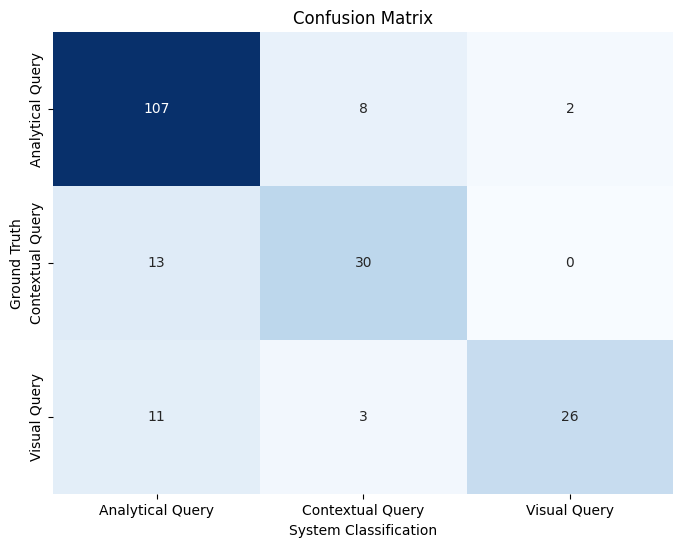

Class               Precision  Recall    F1 Score
----------------  -----------  --------  ----------
Analytical Query       0.8168  0.9145    0.8629
Contextual Query       0.7317  0.6977    0.7143
Visual Query           0.9286  0.65      0.7647
Overall Accuracy       0.8150


In [19]:
test_subset = testset.iloc[0:200]

labels = sorted(set(test_subset["Classification_Ground_Truth"]).union(set(test_subset["System_Classification"])))

labels = [label if label != "I am sorry but I cannot understand the question." else "Unable to Classify" for label in labels]

conf_matrix = create_confusion_matrix(test_subset)

accuracy, precision, recall, f1_score = compute_metrics(conf_matrix, labels)


# New Prompt with More Examples

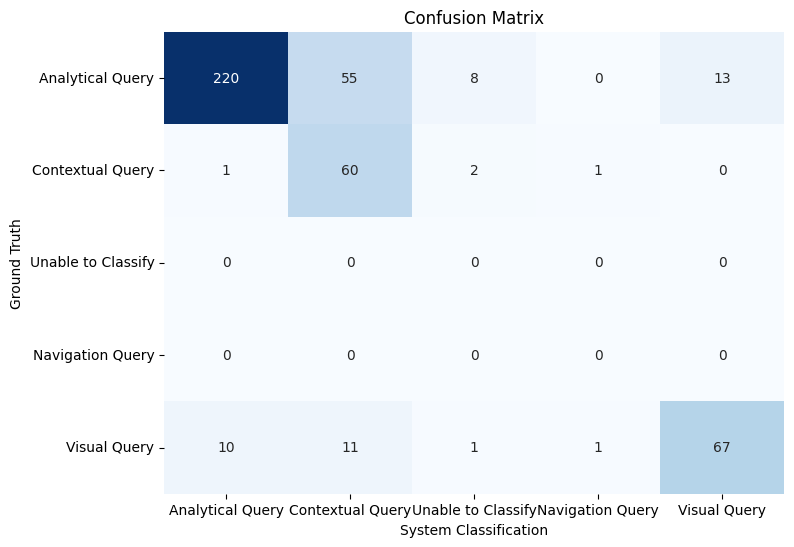

Class                 Precision  Recall    F1 Score
------------------  -----------  --------  ----------
Analytical Query         0.9524  0.7432    0.8349
Contextual Query         0.4762  0.9375    0.6316
Unable to Classify       0.0000  0         0
Navigation Query         0.0000  0         0
Visual Query             0.8375  0.7444    0.7882
Overall Accuracy         0.7711


In [45]:
test = pd.read_csv("classification_results.csv")
test.head()
labels = sorted(set(testset["Classification_Ground_Truth"]).union(set(test["System_Classification"])))
set(testset["Classification_Ground_Truth"])
labels = [label if label != "I am sorry but I cannot understand the question." else "Unable to Classify" for label in labels]

conf_matrix = create_confusion_matrix(test)

accuracy, precision, recall, f1_score = compute_metrics(conf_matrix, labels)



In [33]:
set(testset["Classification_Ground_Truth"])

{'Analytical Query', 'Contextual Query', 'Navigation Query', 'Visual Query'}